# COGS 108 - Diabetes Health Indicators

https://drive.google.com/file/d/19t5Vd7UWJa7F11Ydm2UlMcC8P_fsTowJ/view?usp=sharing

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Names

- Jack Celaya
- Belinda Diaz-Olmedo
- Jihu Lee
- Alela Rathsasombath
- Huaming Wu

# Abstract



We are conducting a study to explore the relationship between lifestyle factors (smoking, physical activity, and diet) and the prevalence of Diabetes Type 2. It is already well known that lifestyle factors are linked to this chronic disease but we wanted to know which factor would have the strongest influence. We also wanted to know if, based on these factors, we could predict its occurrence. If we were able to successfully predict it, then prevention and intervention could be instilled earlier which would in effect reduce its cost. In addition people’s everyday lives would also be improved as some of the symptoms include fatigue, numbness/tingling, frequent infections among other things. To look into this we used a dataset released by the CDC from 2015. It had more than enough participants and a large number of variables too. We started by plotting the variables selected and then used a heatmap to observe correlations. To understand how predictive each of our factors were we used the KNN model (K-Nearest Neighbors). We increased our observations to see if that would increase our accuracy but were not successful. Although we were not able to confidently predict Type 2 Diabetes, our analysis shows that there is a correlation between our selected variables and its prevalence.

# Research Question


Which lifestyle factors, including physical activity, diet, and smoking habits, have the strongest association with the prevalance of diabetes in adults? Can we predict diabetes based off of these lifestyle factors we've chosen to look at?

## Background and Prior Work

Diabetes is a chronic disease that impacts millions of people worldwide and poses many significant health risks. We will be focusing mostly on Type 2 diabetes, which is more common in adults and is closely linked with lifestyle factors. This means that it is an important area of research, especially since diabetes rates continue to rise globally, placing a significant burden on healthcare systems and affecting individuals' quality of life. By understanding the impact of physical activity, diet, and smoking habits on our health, we can better inform the public on diabetes prevention.

Numerous studies have explored the impact of lifestyle on diabetes risk. For instance, a study by the American Diabetes (ADA) concluded that physical activity plays an important role in preventing Type 2 diabetes. This is due to regular exercise improving insulin sensitivity and helping regulate blood glucose levels.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) There has also been many studies on diet and how it influences diabetes risk. It has been shown that diets high in processed sugars and low fiber has been associated with increased likelihoods of developing diabetes.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) Lastly, the CDC warns that smoking CAN increase your risk of type 2 diabetes by over 30%-40% due to changes in blood sugar as well.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3)

In this project, we will build on these previous insights by analyzing data related to physical activity levels, dietary habits, and smoking habits. By quantifying the different factors using data analysis, we can find out which lifestyle choices are strongly associated with diabetes and how these findings will align or differ from these older studies.

<a name="cite_note-1"></a> [^](#cite_ref-1) Ley SH, Hamdy O, Mohan V, Hu FB. Prevention and management of type 2 diabetes: dietary components and nutritional strategies. Lancet. 2014;383(9933):1999-2007. https://doi.org/10.1016/S0140-6736(14)60613-9

<a name="cite_note-2"></a> [^](#cite_ref-2) Cuilin Zhang, Jiaxi Yang; Personalizing Physical Activity for Glucose Control Among Individuals With Type 2 Diabetes: Are We There Yet?. Diabetes Care 1 February 2024; 47 (2): 196–198. https://doi.org/10.2337/dci23-0063

<a name="cite_note-3"></a> [^](#cite_ref-3) Centers for Disease Control and Prevention; Diabetes and Smoking. 15 May 2024. https://www.cdc.gov/diabetes/risk-factors/diabetes-and-smoking.html

# Hypothesis


We hypothesize that among the lifestyle factors of physical activity, diet, and smoking habits, poor diet will show the strongest association with the prevalence of diabetes in adults. We expect this because high sugar and high fat diets have been consistently linked top insulin resistance, which is a large factor in the development of Type 2 diabetes. Dietary habits are also largely involved in blood glucose levels, which are critical in diabetes management. 


# Data

## Data overview


- Dataset #1
  - Dataset Name: Diabetes Health Indicators Dataset
  - Link to the dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data
  - Number of observations: 253,680
  - Number of variables: 22
  - Description: The dataset includes responses from the 2015 BRFSS survey, focusing on diabetes classification and related health indicators. It has three files, each using a different target variable: Diabetes_012 with three classes (0 for no diabetes or pregnancy-related only, 1 for prediabetes, and 2 for diabetes) and Diabetes_binary with two classes (0 for no diabetes, 1 for any form of diabetes). Important features include BMI, age, physical activity level, and smoking status, capturing key health behaviors and demographic information associated with diabetes. We will be using the diabetes_binary_5050 file as we are only concerned with whether a person has or does not have diabetes and because it is relatively cleaned. This dataset is balanced and one-hot encoded, making analysis easier in the future. All datatypes are integers (mostly 0, 1 ), simplifying the process.

  We plan to clean it by first checking to ensure that it is truly balanced. While popular public datasets like these are often well kept, it is good to make sure. We will also be checking for Null/Missing values as we are not sure of how thoroughly the data is cleaned. We will also check for duplicates just in case. We will take a randomized sample from the dataset because it is rather large. To make things easier we will make sure to reset the index as well. Overall, there is not much to be done for cleaning/wrangling the data, but we made it more specific to our research question.

## Diabetes Health Indicators Dataset

In [43]:
import pandas as pd

file = './Diabetes_5050.csv'
df_full = pd.read_csv(file)

# We will double check to make sure it is balanced
print(df_full['Diabetes_binary'].value_counts())

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


Here we import the csv file and read it into df_full. We will also double check that it is balanced as the source says.

### Check for Null/Missing and Duplicates

In [44]:
# No missing values in the dataset
missing = df_full.isnull().sum()
print(f"Number of missing values: {missing.sum()}")

# Considering the size of the dataset, there are little duplicates
duplicates = df_full.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of missing values: 0
Number of duplicate rows: 1635


We are checking to see if there are any missing values. We are also checking to see if there are too many duplicates as this can introduce a bias in our data.

### Take a sample

In [45]:
# We will be using a portion of the actual dataset because of the size of the dataset
df_part = df_full.sample(n=2000, random_state=1)

print(df_part.head())

       Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
25002              0.0     1.0       0.0        1.0  30.0     0.0     0.0   
45944              1.0     1.0       1.0        1.0  33.0     1.0     0.0   
23894              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
6931               0.0     0.0       0.0        1.0  25.0     1.0     0.0   
39255              1.0     0.0       1.0        1.0  29.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
25002                   0.0           1.0     1.0  ...            0.0   
45944                   0.0           1.0     0.0  ...            1.0   
23894                   0.0           0.0     0.0  ...            1.0   
6931                    0.0           1.0     1.0  ...            1.0   
39255                   0.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
25002          0.0      1.

Here we take a sample of the dataset as the original dataset has too much data. We need to ensure that the sample is random as well.

### Create a new dataset with our variables of interest

In [46]:
columns = ['Diabetes_binary', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies']
df_final = df_part[columns]
# Reset the index
df_final.reset_index(drop=True, inplace=True)
print(df_final.head())
print(df_final.describe())

   Diabetes_binary  Smoker  PhysActivity  Fruits  Veggies
0              0.0     0.0           1.0     1.0      1.0
1              1.0     1.0           1.0     0.0      1.0
2              0.0     0.0           0.0     0.0      1.0
3              0.0     1.0           1.0     1.0      1.0
4              1.0     0.0           1.0     1.0      0.0
       Diabetes_binary       Smoker  PhysActivity       Fruits      Veggies
count      2000.000000  2000.000000   2000.000000  2000.000000  2000.000000
mean          0.488500     0.482500      0.704000     0.602000     0.784000
std           0.499993     0.499819      0.456605     0.489608     0.411617
min           0.000000     0.000000      0.000000     0.000000     0.000000
25%           0.000000     0.000000      0.000000     0.000000     1.000000
50%           0.000000     0.000000      1.000000     1.000000     1.000000
75%           1.000000     1.000000      1.000000     1.000000     1.000000
max           1.000000     1.000000      1.0

We are changeing the dataframe to only include our variables of interest, which include 'Diabetes_binary', 'Smoker', 'PhysActivity', 'Fruits', and 'Veggies'. We will check the head and use describe for the final check.

# Results

## Exploratory Data Analysis

Lets start with some common libraries for EDA

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate Analysis

Let's check every categorical variable and plot it for visualization. (0: No, 1: Yes for the variable)

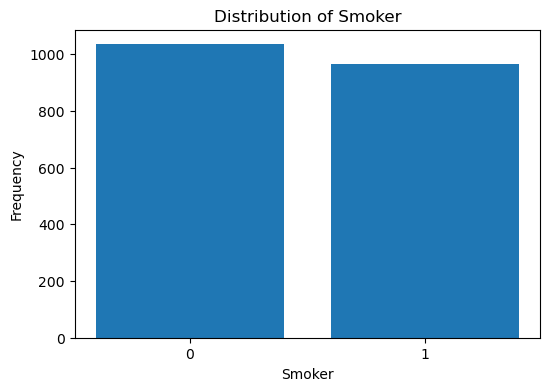

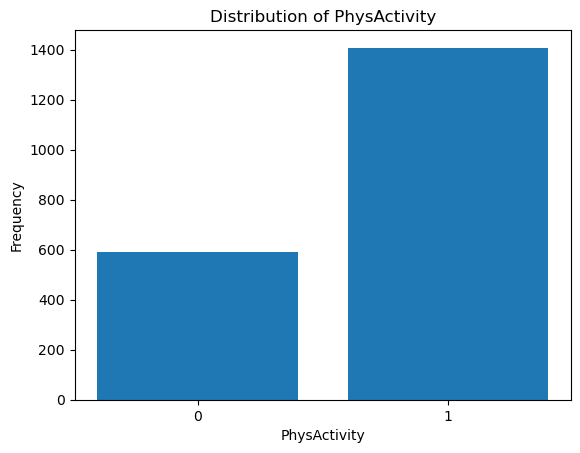

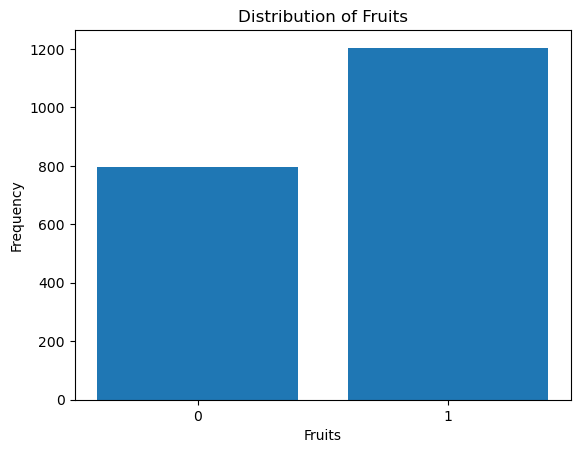

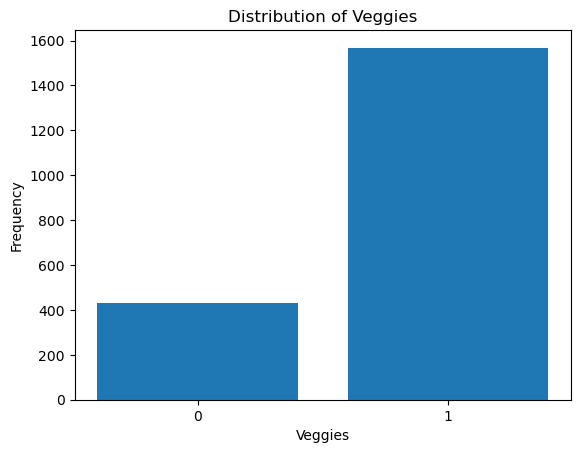

In [48]:
plt.figure(figsize=(6,4))
plot_columns = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies']
# Let's iterate through the columns and plot the distribution of each column
for col in plot_columns:
  counts = df_final[col].value_counts()
  plt.bar(counts.index, counts.values)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.xticks(counts.index)
  plt.show()


From what we can see, there is some imblanace for certain categories. For instance, there are around 400 people that reported not eating veggies while the other 1600 did. We need to make sure that we take this into account later.

### Bivariate Analysis

Now let's perform a bivariate analysis to compare it with our target variable of Diabetes_binary. (0: No, 1: Yes for the variable)

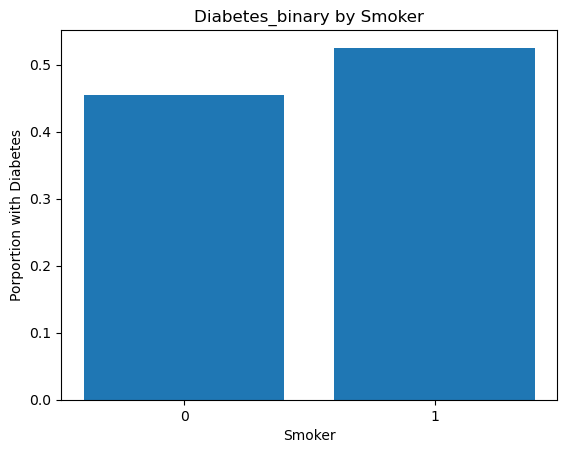

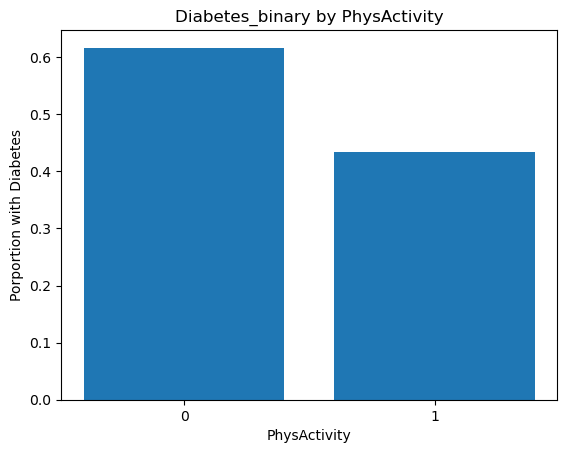

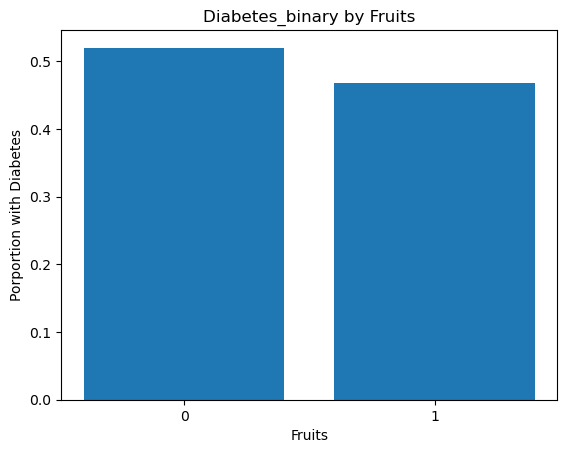

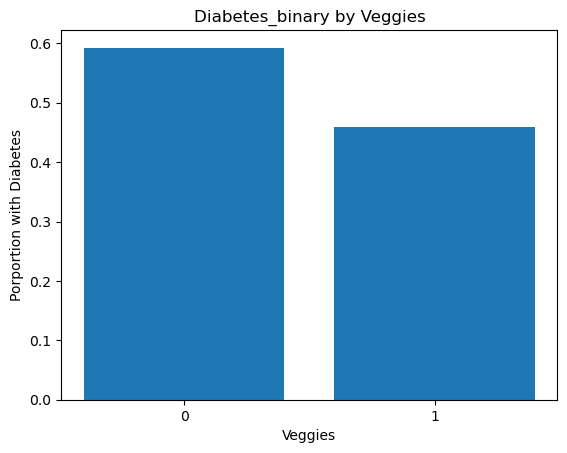

In [49]:
for col in plot_columns:
  grouped_means = df_final.groupby(col)['Diabetes_binary'].mean()
  plt.bar(grouped_means.index, grouped_means.values)
  plt.title(f'Diabetes_binary by {col}')
  plt.xlabel(col)
  plt.ylabel('Porportion with Diabetes')
  plt.xticks(grouped_means.index)
  plt.show()

From our bivariate analysis, we can definitely see some small differences in percentages of people that do have diabetes given a certain category. However, we cannot make any conclusions from just these graphs.

Let's proceed with a heatmap to visulize how strongly each variable correlates with the target variable of Diabetes_binary. This should take into account what we saw in our univariate analysis. It will also allow us to reveal correlations among the independent variables like Smoker and PhysActivity, which can distort the results in our analysis.

### Heatmap

Here is a heatmap to get a better look

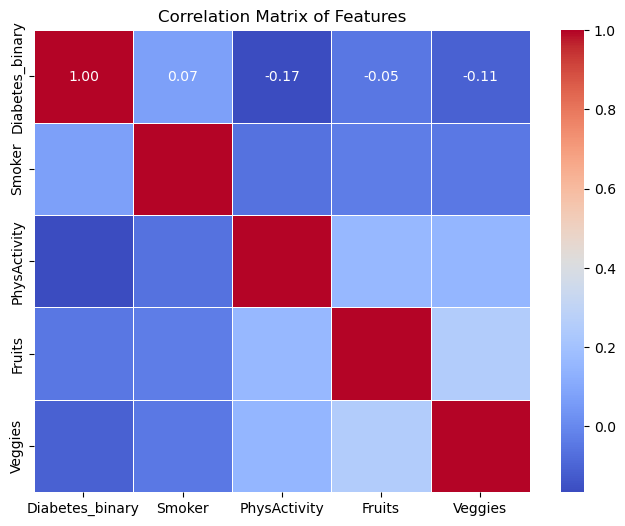

In [50]:
#plot the heatmap
correlation = df_final.corr()
plt.figure(figsize=(8, 6))  # Adjust size as needed
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

From this heatmap, we see that PhysActivity has the highest negative correlation (-0.17) with diabetes_binary and veggies falling slightly behind (-0.11). This suggests that individuals who engage in physical activity are less likely to have diabetes. Fruits and veggies also have negative correlations, but they are not as strong. Smoker has a slight positive correlation, which suggests that there is a potential link there as well. We see a correlation between fruits and veggies (0.25), which makes sense as individuals who eat more fruits are usually more likely to eat vegetables as well. There is also a small correlation among other features like PhysActivity and Fruits (0.16), but these are rather weak or moderate.

We see that the correlations in the heatmap are relatively weak with no values approaching +- 1, which shows that there are no extremly strong linear relationships. From this, we will also most likely not have to worry about multicollinearity between variables. This makes sense as diabetes is often the product of a combination of factorss and not just from one. We will continue with logistic regression in order to finalize our results as we are trying to still find the factor that contributes the MOST out of our variables of interest.

### Linear Regression

Next, we will look take a deeper look at these variables using logisitc regression techinque (sm.logit) that will allow us to model one dependent variable and multiple independant variables with the binary values.


In [51]:
import statsmodels.api as sm


# Add a constant for the intercept
X = df_final[['Smoker', 'PhysActivity', 'Fruits', 'Veggies']]
X = sm.add_constant(X)
y = df_final['Diabetes_binary']

# Logistic regression
model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.673488
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1995
Method:                           MLE   Df Model:                            4
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                 0.02799
Time:                        12:24:02   Log-Likelihood:                -1347.0
converged:                       True   LL-Null:                       -1385.8
Covariance Type:            nonrobust   LLR p-value:                 5.669e-16
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6528      0.130      5.011      0.000       0.397       0.908
Smoker           0.2403

Initially, we see the Pseudo R-Squared is quite low, this is because there are many factors that contribute to diabetes. We also are not using all the columns in the initial dataset since we are only interested in the ones we intially selected. 

## 'Smoker'

The first predictor 'Smoker' has a coefficient of 0.2008, p = 0.031. The coefficient is in log odds. To see what the odds increase looks like, we can take the log-odds from the test and convert them into just odds. We do this using the odds ratio:

$Odds Ratio = e^β$

Beta is our coefficient, which we can substitute for beta and get our odds value of $≈ 1.22$. Next, using percent change, we can calculate the odds:

$Percentage Change=(1.22−1)×100=22$%

We can interpret that the 'Smoker' category is statistically significant, wtih the odds 22% higher for those who smoke compared to those who do not. We will use this percentage change for all other categories we've included.

## 'PhysActivity'

The second predicitor 'PhysActivity' has a coefficient of -0.5528, and p < 0.001. This is highly statistically significant and when we go ahead and calculate the odds:

$exp(−0.5528)≈0.58, or$ 42%

The odds of being diabetic go down by 42% with individuals who are less active.

## 'Fruits'

the third predictor 'Fruits' has a coefficient of 0.0567, p = 0.568. Based off of how small the coefficient is alone, we can see that fruits are not statistically significant when it comes to impacting diabetes.

## 'Veggies'

the last predictor 'Veggies' has a coefficient of -0.3149, p = 0.007. Which turns out to be statistically significant with the odds going down by 27% compared to indivuals who are not eating vegetables.

$exp(−0.3149)≈0.73, or$ 27%

## Summary

- Smoking increases diabetes risk significantly.

- Physical activity and regular vegetable consumption reduces the risk of getting diabetes.

- Fruit consumption does not have a statistically significant effect in this dataset.

## K-Nearest Neighbors (KNN)

Knowing that there are some strong correlations, we wanted to see if it was possible to predict diabetes using these different factors since there are some strong correlations. 

K-Nearest Neighbors or KNN, is a machine learning model that classifies a sample based on the "majority vote". It is one of the simpler models to use and is useful for classification and regression which is what we are looking for.


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

To get started with the data preprocessing, we separated our variables into X and y. y is what we are looking to predict. The data will need to be split into training and test sets for both X and y. The test size is how we'll be splitting the data (30% test, 70% training). Standardizing the features it fitting and transforming the data we have to be fit for the model.

In [53]:
# Features and target
X = df_final[['Smoker', 'PhysActivity', 'Fruits', 'Veggies']]  # independent variables
y = df_final['Diabetes_binary']  # dependent variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Now that we have the data ready, we are able to create the KNN classifier and fit the model with the data! Our k value will be set it 5 to start, once we see how it performs we'll be better able to optimize the model using cross-validation.

In [54]:
# Create k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

The model is fit and is now ready for use, the k-value in the parenthesis is what we can change.

In [55]:
# Predict on the test data
y_pred = knn.predict(X_test_scaled)

In [56]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))


[[131 176]
 [118 175]]
              precision    recall  f1-score   support

         0.0       0.53      0.43      0.47       307
         1.0       0.50      0.60      0.54       293

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600



Taking a look at our results, it doesn't look like it is very good at predicting diabetes. Doing slightly better at predicting non-diabetics than actual diabetics.

Even when you run a cross-validation test to figure out the best k-value, and rerun the model, it still doesnt do much better than before. If we use all the data givin in the beginning, there is potential for a better outcome.

Copying what we just did for this first model with our sample dataset of 2000 responses, we instead created another sample but with 50000 responses instead and fit it to the KNN model!

In [57]:
# We will be using a portion of the actual dataset because of the size of the dataset
df_part2 = df_full.sample(n=50000, random_state=1)

print(df_part2.head())

       Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
25002              0.0     1.0       0.0        1.0  30.0     0.0     0.0   
45944              1.0     1.0       1.0        1.0  33.0     1.0     0.0   
23894              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
6931               0.0     0.0       0.0        1.0  25.0     1.0     0.0   
39255              1.0     0.0       1.0        1.0  29.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
25002                   0.0           1.0     1.0  ...            0.0   
45944                   0.0           1.0     0.0  ...            1.0   
23894                   0.0           0.0     0.0  ...            1.0   
6931                    0.0           1.0     1.0  ...            1.0   
39255                   0.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
25002          0.0      1.

In [58]:
columns = ['Diabetes_binary', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies']
df_final = df_part2[columns]
# Reset the index
df_final.reset_index(drop=True, inplace=True)
print(df_final.head())
print(df_final.describe())

   Diabetes_binary  Smoker  PhysActivity  Fruits  Veggies
0              0.0     0.0           1.0     1.0      1.0
1              1.0     1.0           1.0     0.0      1.0
2              0.0     0.0           0.0     0.0      1.0
3              0.0     1.0           1.0     1.0      1.0
4              1.0     0.0           1.0     1.0      0.0
       Diabetes_binary        Smoker  PhysActivity        Fruits       Veggies
count     50000.000000  50000.000000  50000.000000  50000.000000  50000.000000
mean          0.499180      0.477940      0.704760      0.612060      0.789880
std           0.500004      0.499518      0.456155      0.487286      0.407398
min           0.000000      0.000000      0.000000      0.000000      0.000000
25%           0.000000      0.000000      0.000000      0.000000      1.000000
50%           0.000000      0.000000      1.000000      1.000000      1.000000
75%           1.000000      1.000000      1.000000      1.000000      1.000000
max           1.0000

In [59]:
# Features and target
X = df_final[['Smoker', 'PhysActivity', 'Fruits', 'Veggies']]  # independent variables
y = df_final['Diabetes_binary']  # dependent variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
# Create k-NN classifier with k=19
# This number comes from the cross validation from below to get the best k fit.
knn = KNeighborsClassifier(n_neighbors=19)

# Fit the model
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=19)

In [61]:
# Predict on the test data
y_pred = knn.predict(X_test_scaled)

In [62]:

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))


[[5166 2346]
 [3979 3509]]
              precision    recall  f1-score   support

         0.0       0.56      0.69      0.62      7512
         1.0       0.60      0.47      0.53      7488

    accuracy                           0.58     15000
   macro avg       0.58      0.58      0.57     15000
weighted avg       0.58      0.58      0.57     15000



The f1-score have now is a bit better than what we saw with less values! This is of course with our optimized k-value which came back as 19. Our f1-score is at a 53% which is a lot better than the low 50 score from before. 

In [63]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Test multiple k values
k_values = range(1, 21)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    scores.append(np.mean(cv_scores))

# Find the best k
best_k = k_values[np.argmax(scores)]
print(f"Best k: {best_k}")


Best k: 19


## Results

While the model does work and can predict diabetes, it is not very good at it and isn't much better than a 50/50 chance of yes or no. The purpose was to see if it was possible that we could predict diabetes using our selected variables and ultimately, we did. That said, the predictions are not very strong and wouldn't be a reliable source. 

# Ethics & Privacy

**Are there any biases/privacy/terms of use issues with the data you propsed?
Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)**

- There is potential for population representation to be a bias. The dataset may underrepresent or not include certain demographics. There are many factors such as socioeconomic status, access to healthcare, race etc that may not be accounted for in the data. We also do not know the data collection methodology. If the information recorded is from self-recording, then there is potential for innaccuracies. 

- As for potential privacy concerns, it's important that the data is anonymized since it is sensitive information of peoples health indicators and risks. It is important that all the data collected was in compliance with privacy laws and that the use of it was clear to the participants.

**How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?**

- When we do our data analysis, we recognize that some of our models may inherit biases that are within the data. An example would be if a model finds a strong correlation between low physical activity and diabetes, confounding variables need to be accounted for, like lifestyle habits and healthcare. Communicating our data  must be done carefully to avoid reinforcing stereotypes or placing any sort of blame on individuals for their health conditions post analysis.

**How will you handle issues you identified?**

- We need to ensure that our cleaned data will be representative of the general population. Supplementing our data with another set or acknowledging our limitations is another important thing we need to work on. We will make sure that there are no privacy concerns by making sure that we get reliable sources from reliable sites. This would reduce the risk of a dataset that lacks regulation. There also is no way to know about the demographics of the data that will be used since it is pulled from the CDC and consists of ~200,000 participant entries. Data limitations, assumptions, and potential impacts of confounding variables will be included in the final reporting. Addressing the impact of systemic issues will help avoid oversimplifying the relationship between general lifestyle and risk of diabetes.

# Discussison and Conclusion

As stated in the beginning, diabetes is a disease that has been on the rise in recent years. It affects people’s everyday lives and can lead to other health problems like strokes and kidney failure. Although Type 2 diabetes can be caused by genetics, lifestyle choices have been strongly linked to the development of this particular disease. For our study we wanted to learn what specific factors are more likely to lead to diabetes type 2 and which one could predict it. This was a broad question so we decided to focus on 4 variables that we thought would have the largest effects on diabetes prevalence: physical activity, smoking habits, and diet (specifically if someone ate fruits and vegetables). We hypothesized that these factors would be crucial to look at because it is known that physical activity and diet can help reverse type two diabetes. We wanted to observe this from a large real-world dataset and we found the “Diabetes Health Indicators Dataset”. Although the data seemed to be clean we decided to double check by looking for null/missing values and any duplicates. Our group decided to work with a randomly selected 2,000 of the original observations. We made this our dataset and included only our four variables.

We plotted graphs for each of our variables and then did a bivariate analysis of them with regards to the target variable (Diabetes Type 2). Our graphs visually represented the number of people who said “yes” (yes = 1) for a variable and also had diabetes (yes = 1) but this wasn’t enough to have a definite answer. We proceeded to make a heat map to show correlation. As we know the closer to 1 or -1, the stronger the correlation. We found that physical activity had the strongest negative correlation meaning that people who did physical activity were less likely to have diabetes. On the contrary, a person who smoked was more likely to have Diabetes Type 2. Using linear regression we got the percentages for each factor. We wanted to know if we could predict Diabetes Type 2 and for that we used the KNN model (K-Nearest Neighbors). A quick search tells you that this “is a machine learning algorithm that uses a training dataset to make predictions about new data points”. X was our factors (physical activity, smoker, fruits, and veggies) while Y was Diabetes Type 2. After fitting the model, we ran it but realized it didn’t do too well. We then ran a cross validation test to figure out the best k-value we could use. We ran the KNN with our new value, 19, but it didn’t do much better. We decided to try a larger sample to try and improve its accuracy; we went from 2,000 to 50,000 observations. Although it improved it wasn’t reliable enough for us to answer the research question. We would like to note that since it is a very large survey there is a chance that we have some sort of bias within our data but the data was anonymized for participant’s privacy.


# Team Contributions

Jack:
- Added logistic regression portion
- Added KNN model
- Wrote the discussion for logistic regression and KNN walkthrough

Huaming
- Found datasets and cleaned them
- Basic EDA
- Descriptions steps for data analysis

Belinda: 
- Contributed to defining the research question and picking out the variables we would be using 
- Collaborated with team to form our hypothesis 
- Wrote the Abstract 
- Wrote the Discussion & Conclusion Section 
- Designed the slides for video presentation 
- Drafted the script

Jihu: 
- Helped find datasets
- Discussed and decided variables with teammates
- Wrote description of dataset
- Wrote and edited parts of video script
- Presented in video

Alela 
- Helped find datasets
- helped define research question
- Discussed and decided variables with teammates
- Created group project chart with meeting agenda and timelines
- Video presentation